Importing the Libraries

In [1]:
from audioop import cross # type: ignore

import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import pickle
%matplotlib inline

from sklearn.ensemble import GradientBoostingClassifier # type: ignore
from sklearn.model_selection import train_test_split,cross_validate,GridSearchCV # type: ignore

C:\Users\user\AppData\Local\Temp\ipykernel_10920\4182998102.py:1: DeprecationWarning: 'audioop' is deprecated and slated for removal in Python 3.13
  from audioop import cross # type: ignore


In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,False
764,2,122,70,27,0,36.8,0.340,27,False
765,5,121,72,23,112,26.2,0.245,30,False
766,1,126,60,0,0,30.1,0.349,47,True


In [4]:
data['diabetes'] = data['diabetes'].apply(lambda x:1 if  x==True else 0)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   diabetes                  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.shape

(768, 9)

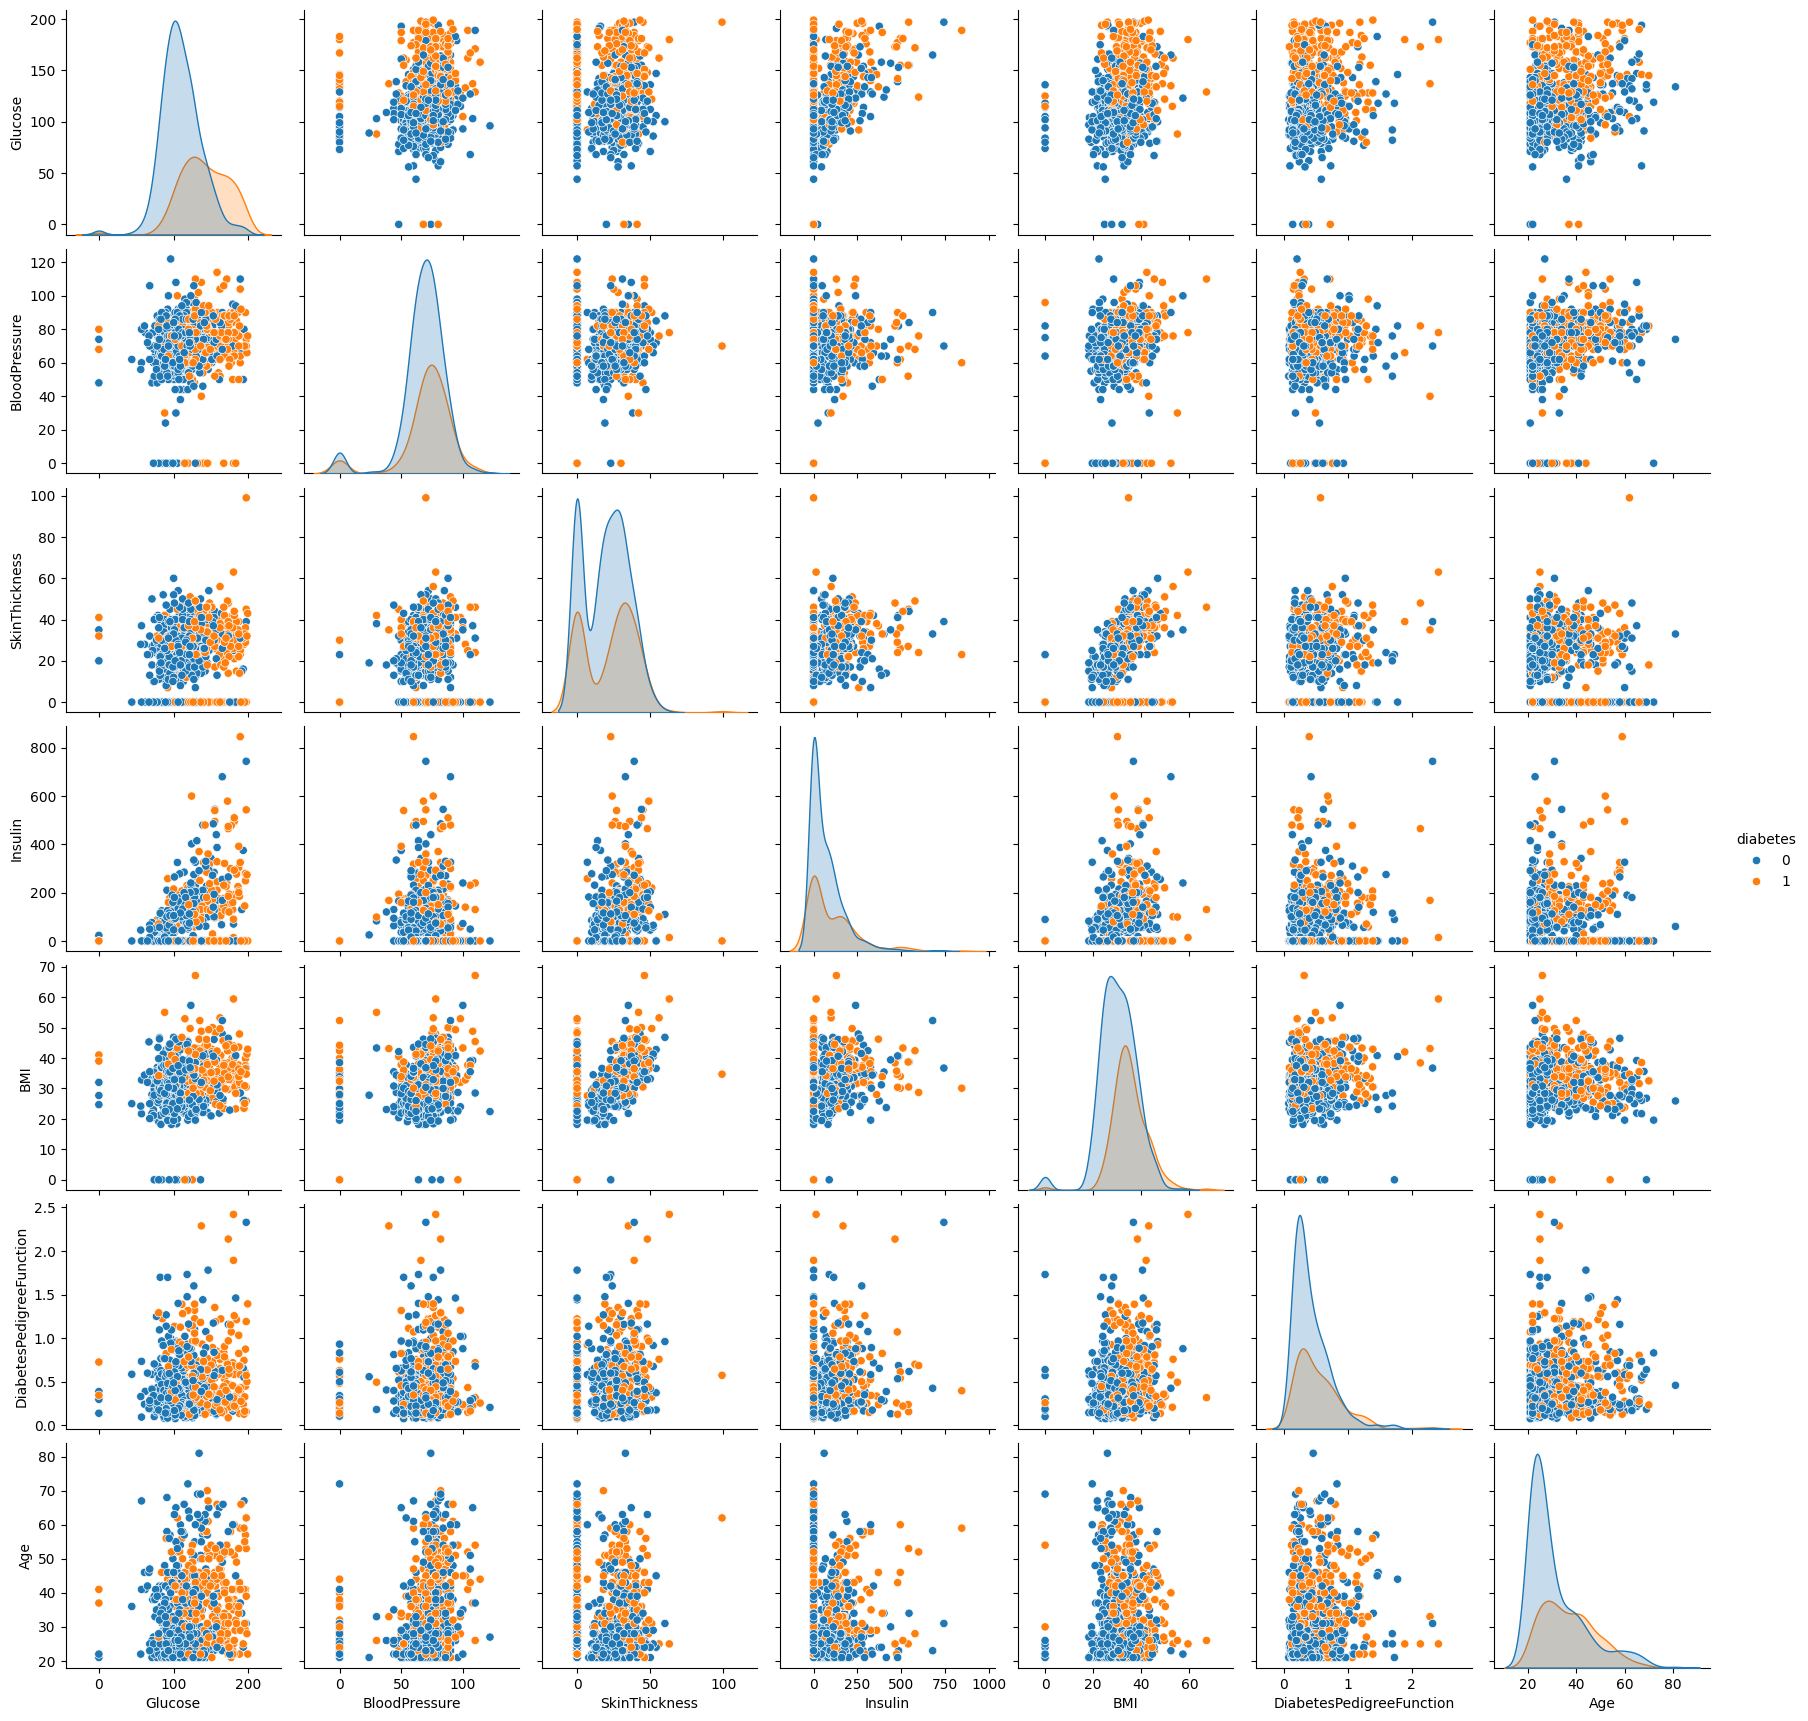

In [7]:
sns.pairplot(data, hue='diabetes', vars= data.columns[1:-1])

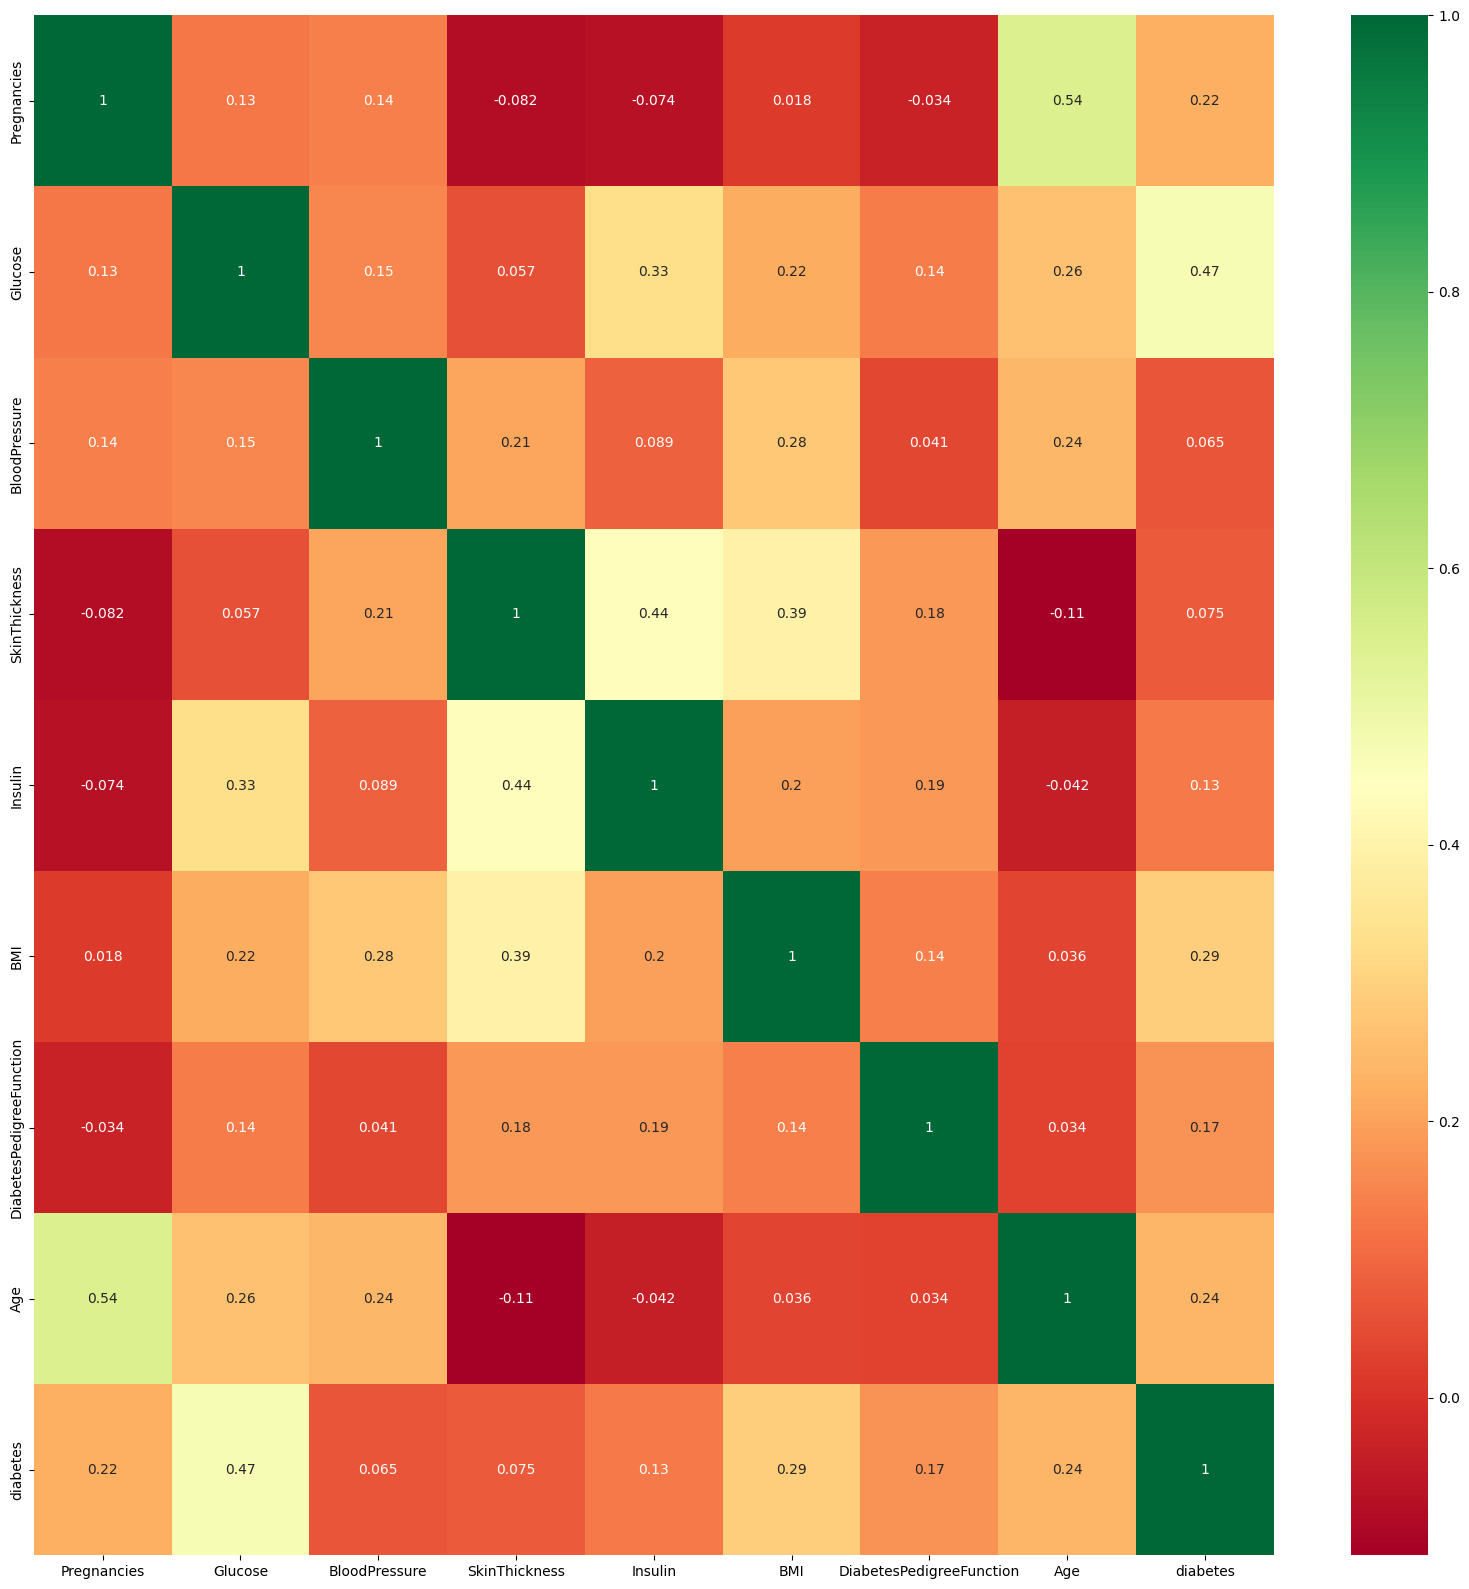

In [8]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<Axes: ylabel='count'>

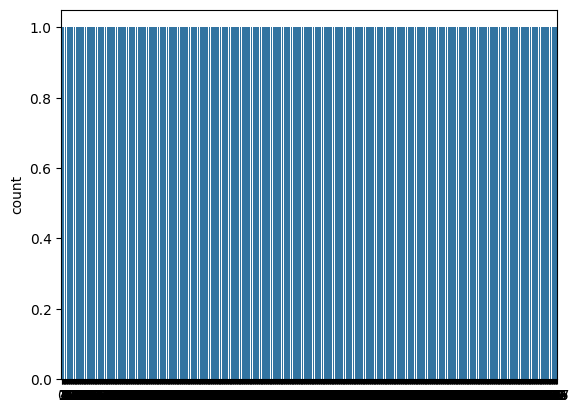

In [9]:
sns.countplot(data['diabetes'])  

In [10]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,diabetes
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [11]:
print("total number of rows : {0}".format(len(data)))
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("number of rows missing diastolic_bp: {0}".format(len(data.loc[data['BloodPressure'] == 0])))
print("number of rows missing insulin: {0}".format(len(data.loc[data['Insulin'] == 0])))
print("number of rows missing bmi: {0}".format(len(data.loc[data['BMI'] == 0])))
print("number of rows missing diab_pred: {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("number of rows missing age: {0}".format(len(data.loc[data['Age'] == 0])))
print("number of rows missing skin: {0}".format(len(data.loc[data['SkinThickness'] == 0])))

total number of rows : 768
number of rows missing glucose_conc: 5
number of rows missing diastolic_bp: 35
number of rows missing insulin: 374
number of rows missing bmi: 11
number of rows missing diab_pred: 0
number of rows missing age: 0
number of rows missing skin: 227


In [12]:
na_columns = ['Glucose','SkinThickness','Insulin','BMI','BloodPressure']
data[na_columns] = data[na_columns].replace(0,np.nan)

In [13]:
df = data.copy()

for column in ['Glucose','SkinThickness','Insulin']:
    median_0 = data[column][data['diabetes']==0].median()
    median_1 = data[column][data['diabetes']==1].median()
    
df.loc[df['diabetes'] == 0, column] = data.loc[df['diabetes'] == 0, column].fillna(median_0)
df.loc[df['diabetes'] == 1, column] = data.loc[df['diabetes'] == 1, column].fillna(median_1)


In [14]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,diabetes
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,NaN,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,169.5,30.1,0.349,47,1


In [15]:
df["BloodPressure"] = df["BloodPressure"].fillna(df["BloodPressure"].median())
df["BMI"] = df["BMI"].fillna(df["BMI"].median())

In [16]:
X = df.drop('diabetes',axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8,183.0,64.0,NaN,169.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,NaN,169.5,30.1,0.349,47


In [17]:
y = df.diabetes
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

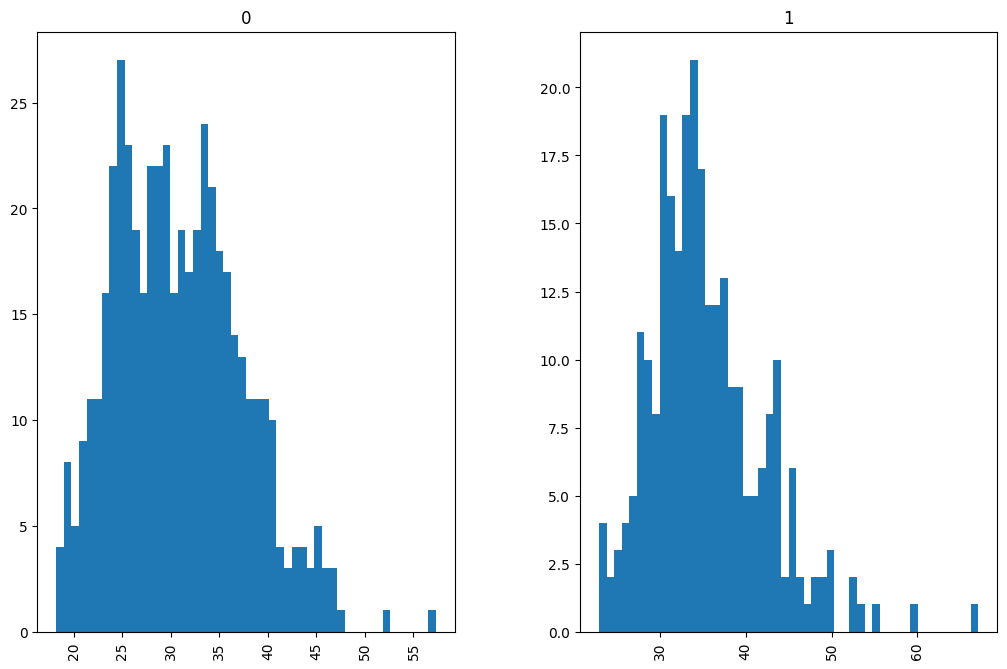

In [18]:
data.hist(column='BMI', bins=50, by='diabetes', figsize=(12,8))

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

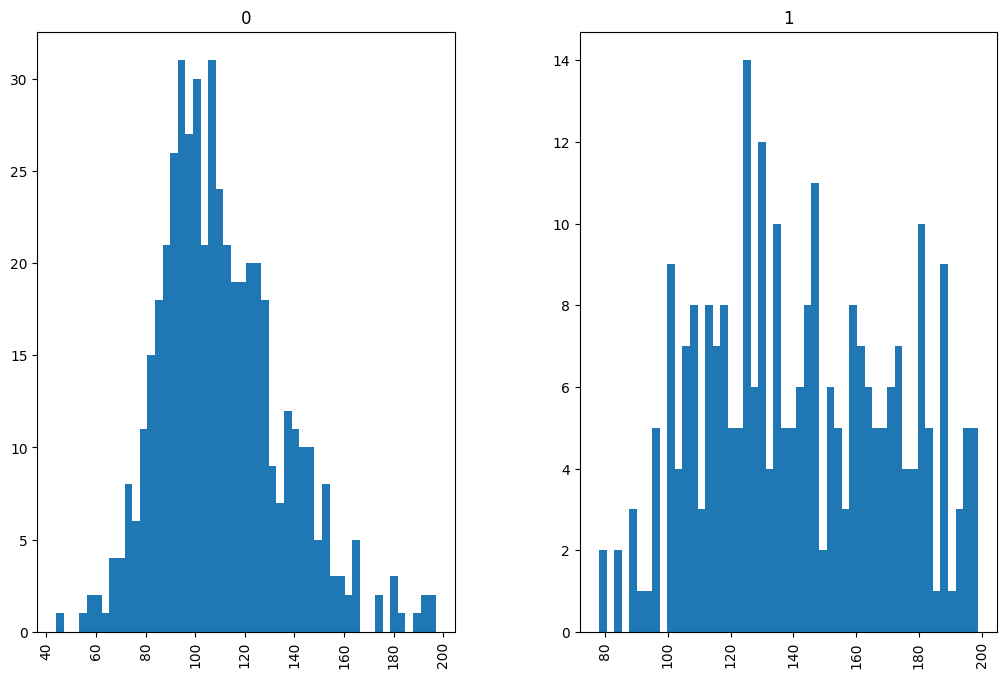

In [19]:
data.hist(column='Glucose',bins=50,by='diabetes',figsize=(12,8))

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

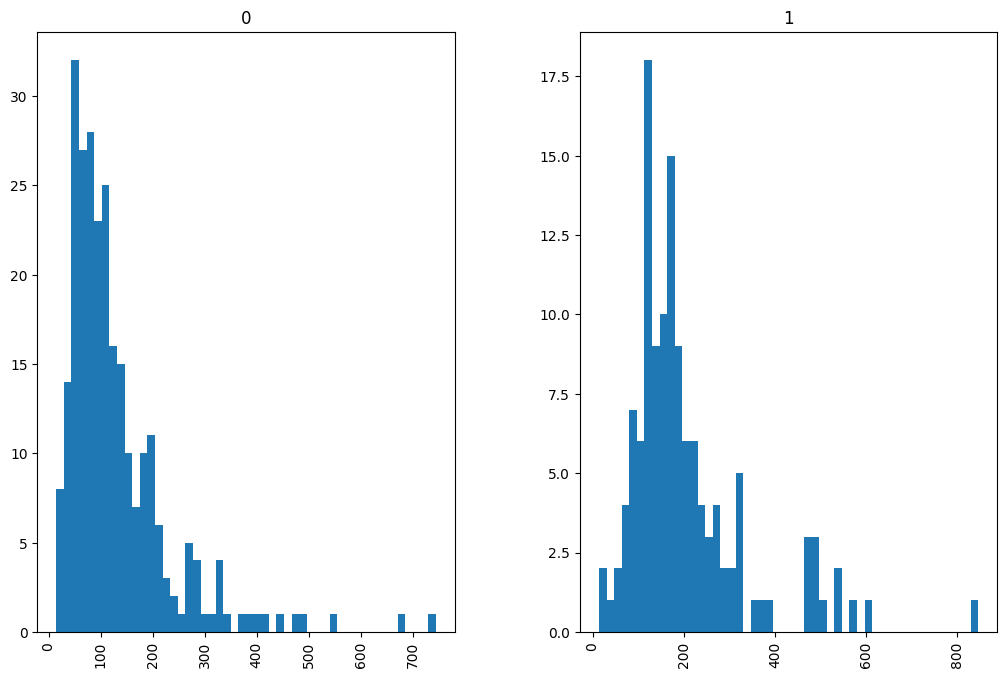

In [20]:
data.hist(column='Insulin',bins=50,by='diabetes',figsize=(12,8))

Creating metrics for evaluations

In [21]:
from sklearn import metrics
f1 = metrics.make_scorer(metrics.f1_score)
accuracy = metrics.make_scorer(metrics.accuracy_score)
precision = metrics.make_scorer(metrics.precision_score)
recall = metrics.make_scorer(metrics.recall_score)
auc = metrics.make_scorer(metrics.roc_auc_score)

In [22]:
scoring = {
    "accuracy":accuracy,
    "precision":precision,
    "recall": recall,
    "f1":f1,
}

In [23]:
def printResults(cv):
    print("Accuracy  {:.3f} ({:.3f})".format(cv["test_accuracy"].mean(), cv["test_accuracy"].std()))
    print("Precision {:.3f} ({:.3f})".format(cv["test_precision"].mean(), cv["test_precision"].std()))
    print("Recall    {:.3f} ({:.3f})".format(cv["test_recall"].mean(), cv["test_recall"].std()))
    print("F1        {:.3f} ({:.3f})".format(cv["test_f1"].mean(), cv["test_f1"].std()))

Creating Our Model

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [25]:
gbc = GradientBoostingClassifier()

In [26]:
from  sklearn.impute import SimpleImputer

#creating an imputer 
imputer = SimpleImputer(strategy='mean')

#fit on training the data and transform both train & test sets
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

#convert back to a DataFrame 
import pandas as pd
X_train = pd.DataFrame(X_train, columns=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
                                         "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"])
X_test = pd.DataFrame(X_test, columns=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
                                       "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"])

In [27]:
print(X_train.isnull().sum()) 


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [28]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [29]:
y_pred = gbc.predict(X_test)

In [30]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       128
           1       0.85      0.78      0.81        64

    accuracy                           0.88       192
   macro avg       0.87      0.86      0.86       192
weighted avg       0.88      0.88      0.88       192



<Axes: >

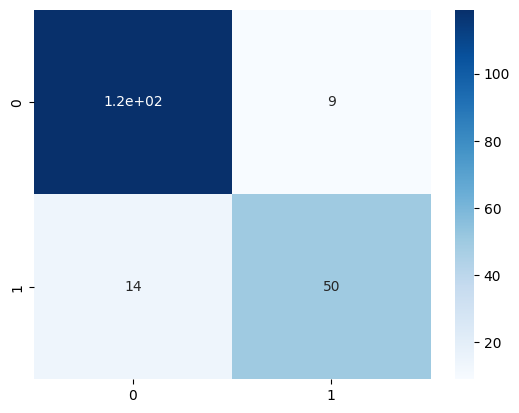

In [31]:
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")

In [32]:
cv_gbc = cross_validate(gbc, X_train, y_train, scoring=scoring, cv=5)

In [33]:
printResults(cv_gbc)

Accuracy  0.896 (0.020)
Precision 0.876 (0.034)
Recall    0.823 (0.040)
F1        0.848 (0.030)


Tuning our ml model

In [34]:
params = {
    'loss': ['deviance','exponential'],
    'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
    'n_estimators': [100,200,300,400,500,600,700,800,800,1000],
}
gs = GridSearchCV(estimator = gbc,param_grid=params,cv=5)

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

# Define the parameter grid for tuning hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # Step size to shrink the weight of each tree
    'max_depth': [3, 5, 7],  # Maximum depth of the individual trees
}

# Create the GradientBoostingClassifier model
model = GradientBoostingClassifier()

# Use GridSearchCV with 5-fold cross-validation
gs = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=1)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Now fit the model using GridSearchCV
gs.fit(X_imputed, y)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [36]:
gs.best_score_

0.8971903913080383

In [37]:
gs.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}

In [38]:
gbc_best = GradientBoostingClassifier(learning_rate=0.01,max_depth=5,n_estimators=100)

In [39]:
gbc_best.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5)

In [40]:
y_pred = gbc_best.predict(X_test)

In [41]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       128
           1       0.83      0.75      0.79        64

    accuracy                           0.86       192
   macro avg       0.85      0.84      0.84       192
weighted avg       0.86      0.86      0.86       192



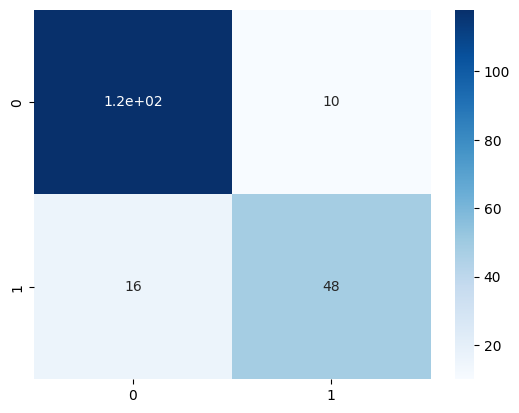

In [42]:
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues");

In [43]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier

# Create the imputer (using mean strategy)
imputer = SimpleImputer(strategy='mean')

# Impute the missing values in X
X_imputed = imputer.fit_transform(X)

# Now perform cross-validation
cv_gbc_best = cross_validate(gbc_best, X_imputed, y, cv=5, scoring=scoring)

# Print results
print(cv_gbc_best)


{'fit_time': array([0.55792975, 0.72736716, 0.53512549, 0.50933909, 0.47987604]), 'score_time': array([0.00996256, 0.01726818, 0.01395321, 0.01483893, 0.0150435 ]), 'test_accuracy': array([0.8961039 , 0.87662338, 0.88311688, 0.92156863, 0.90849673]), 'test_precision': array([0.88      , 0.81818182, 0.95      , 0.91836735, 0.93333333]), 'test_recall': array([0.81481481, 0.83333333, 0.7037037 , 0.8490566 , 0.79245283]), 'test_f1': array([0.84615385, 0.82568807, 0.80851064, 0.88235294, 0.85714286])}


In [44]:
printResults(cv_gbc_best)

Accuracy  0.897 (0.016)
Precision 0.900 (0.047)
Recall    0.799 (0.051)
F1        0.844 (0.025)


In [45]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

# Create an imputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Impute missing values in X
X_imputed = imputer.fit_transform(X)

# Now run cross-validation with the imputed data
accuracies = cross_val_score(gbc_best, X_imputed, y, cv=10)

# Print accuracies
print(accuracies)


[0.8961039  0.92207792 0.84415584 0.8961039  0.85714286 0.92207792
 0.88311688 0.93506494 0.86842105 0.94736842]


In [46]:
import pickle

filename = 'diabetes-model.pkl'
pickle.dump(gbc_best,open(filename,'wb'))

In [47]:
import pickle
from sklearn.metrics import accuracy_score

# Load the saved model
with open('diabetes-model.pkl', 'rb') as model_file:
    loaded_rf = pickle.load(model_file)

# Make predictions using the loaded model
Y_pred_loaded_rf = loaded_rf.predict(X_test)  

# Ensure y_test is your target labels for the test set
# Evaluate the loaded model
loaded_accuracy = round(accuracy_score(Y_pred_loaded_rf, y_test) * 100, 2)  # y_test is your true labels

print(f"Accuracy of the loaded model: {loaded_accuracy}%")


Accuracy of the loaded model: 86.46%


Testing the AI-model

In [48]:
import pickle
import pandas as pd

# Load the saved model
with open('diabetes-model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [49]:
# Create a DataFrame with the same columns as the training data
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

#adding data for testing 
person_data =pd.DataFrame([[4, 200, 80, 30, 150, 45.5, 1.2, 55]], columns=columns)  

# Make prediction using the loaded model
prediction = loaded_model.predict(person_data)

# Output the result
if prediction[0] == 1:
    print("You are at risk of having diabetes!🤒  "
          "Please consult a doctor to check on you!")
else:
    print("You are not at risk of diabetes! Continue Good Health Practices😀")
    
print(f"Tested with the accuracy: {loaded_accuracy}%")

You are at risk of having diabetes!🤒  Please consult a doctor to check on you!
Tested with the accuracy: 86.46%
